In [6]:
# 按行读取2015-08-01.txt的数据
# 2015-08-01.txt的数据格式为：矢量起点，矢量终点
import networkx as nx
import matplotlib.pyplot as plt

cnDict = {}
usDict = {}
f_cn = open('ipip-asn-CN-all.txt', 'r')
f_us = open('ipip-asn-US-all.txt', 'r')
for line in f_cn:
    if line[0] == '\n':
        continue
    oneLine = line.split(',')
    # print(oneLine[1:3])
    # cnDict[oneLine[0]] = oneLine[1:3]
    cnDict[oneLine[0]] = int(oneLine[1])+int(oneLine[2])


for line in f_us:
    if line[0] == '\n':
        continue
    oneLine = line.split(',')
    # print(oneLine[1:3])
    usDict[oneLine[0]] = int(oneLine[1])+int(oneLine[2])


C:\Users\Anne\AppData\Local\Temp\ipykernel_22868\2423642789.py:20: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  nx.draw(cnas_graph, pos=nx.nx_pydot.graphviz_layout(cnas_graph), node_size=node_weight,font_size=8, with_labels=True, arrows=True)


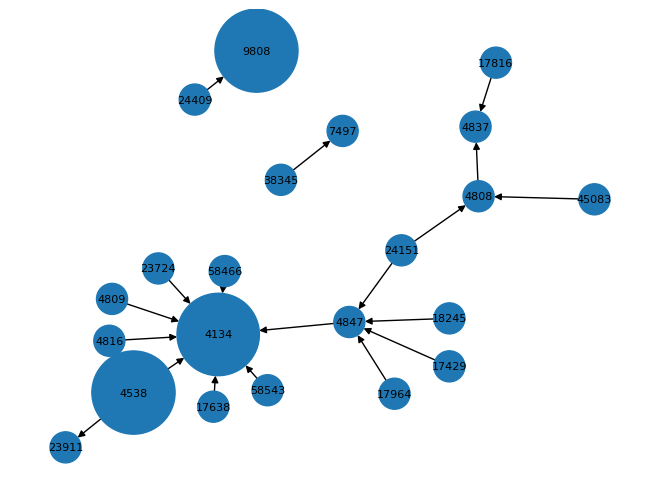

In [56]:
# from networkx.drawing.nx_agraph import graphviz_layout
cnas_graph = nx.DiGraph()
f = open('2015-08-01.txt', 'r')
for line in f:
    # print(line)
    oneLine = line.split(',')
    # print(len(oneLine))
    A = oneLine[0].strip()
    B = oneLine[1].strip()
    if len(oneLine) == 2:
        if A in cnDict.keys() and B in cnDict.keys():
            cnas_graph.add_edge(A, B)
            cnas_graph.nodes[A]['weight'] = cnDict[A]
            cnas_graph.nodes[B]['weight'] = cnDict[B]
node_weight = [max(500,v/5000000000) for v in list(nx.get_node_attributes(cnas_graph, 'weight').values())]
# nx.draw(cnas_graph, node_size=node_weight, with_labels=True, arrows=True, pos = nx.spring_layout())
# pos = nx.spring_layout(cnas_graph,scale=100)
# pos = nx.kamada_kawai_layout(cnas_graph,scale=100)
# pos = nx.nx_pydot.graphviz_layout(cnas_graph, prog='dot')
nx.draw(cnas_graph, pos=nx.nx_pydot.graphviz_layout(cnas_graph), node_size=node_weight,font_size=8, with_labels=True, arrows=True)

# 显示图形
plt.show()

In [61]:
# from networkx.drawing.nx_agraph import graphviz_layout
usas_graph = nx.DiGraph()
f = open('2015-08-01.txt', 'r')
for line in f:
    # print(line)
    oneLine = line.split(',')
    # print(len(oneLine))
    A = oneLine[0].strip()
    B = oneLine[1].strip()
    if len(oneLine) == 2:
        if A in usDict.keys() and B in usDict.keys():
            usas_graph.add_edge(A, B)
            usas_graph.nodes[A]['weight'] = usDict[A]
            usas_graph.nodes[B]['weight'] = usDict[B]
node_weight = [max(100,min(1000,v/5000000000)) for v in list(nx.get_node_attributes(usas_graph, 'weight').values())]
plt.figure(figsize=(40, 40))
nx.draw(usas_graph, pos=nx.nx_agraph.graphviz_layout(usas_graph), node_size=node_weight,font_size=6, with_labels=False, arrows=True)

# 显示图形
plt.show()

ImportError: requires pygraphviz http://pygraphviz.github.io/

<Figure size 4000x4000 with 0 Axes>